In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
Data = pd.read_excel('Email_complaint_machine_lear_indrani.xls')

Data.head()

,DOCKET_NO,COMP_TYPE,COMPLAINT
0,9239,C,Meter reading 004066 as on 04.01.2023.. please...
1,9238,C,meter reading 44287 as on 04.01.2023. Please u...
2,9237,C,Meter reading 004200 as on 04.01.2023. Please...
3,9236,C,Bill is being generated for an absurd amount w...
4,9235,C,@CESCLimited\r\n [Grievance] 0ur electricity r...


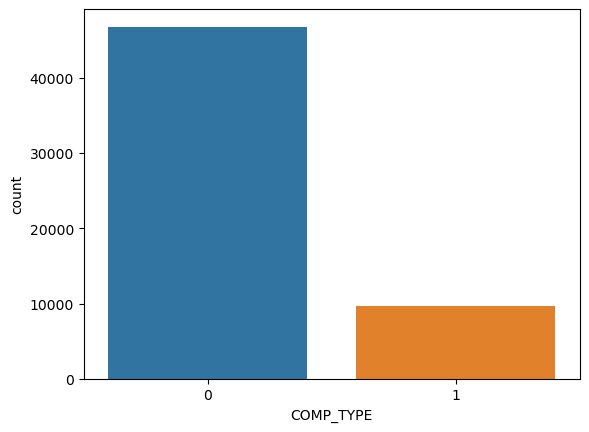

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=Data, x='COMP_TYPE')
plt.show()

In [ ]:
plt.xlabel('Points')
plt.ylabel('Assists')

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data.COMP_TYPE= le.fit_transform(Data.COMP_TYPE.values)

In [4]:
Data.head()

,DOCKET_NO,COMP_TYPE,COMPLAINT
0,9239,0,Meter reading 004066 as on 04.01.2023.. please...
1,9238,0,meter reading 44287 as on 04.01.2023. Please u...
2,9237,0,Meter reading 004200 as on 04.01.2023. Please...
3,9236,0,Bill is being generated for an absurd amount w...
4,9235,0,@CESCLimited\r\n [Grievance] 0ur electricity r...


In [5]:
Data['COMPLAINT'] = Data['COMPLAINT'].str.replace('\@', '', regex=True)


In [6]:
Data['COMPLAINT'] = Data['COMPLAINT'].str.replace('\#', '', regex=True)


In [7]:
whitespace = "\r\n\t"

Data['COMPLAINT']=Data['COMPLAINT'].apply(lambda x: x.strip(whitespace))

In [8]:
Data.head()

,DOCKET_NO,COMP_TYPE,COMPLAINT
0,9239,0,Meter reading 004066 as on 04.01.2023.. please...
1,9238,0,meter reading 44287 as on 04.01.2023. Please u...
2,9237,0,Meter reading 004200 as on 04.01.2023. Please...
3,9236,0,Bill is being generated for an absurd amount w...
4,9235,0,CESCLimited\r\n [Grievance] 0ur electricity re...


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm


In [10]:
# Split in train and with original data
X = Data['COMPLAINT']
y = Data['COMP_TYPE']
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
cv = CountVectorizer()
features = cv.fit_transform(X_train_org)

model = svm.SVC()
model.fit(features,y_train_org)

features_test = cv.transform(X_test_org)
print(model.predict(features_test))
print(model.score(features_test,y_test_org))



[1 0 0 ... 1 0 0]
0.966805346552182


In [12]:
def find(x):
    if x == 1:
        print ("Mail is BILLING related complaint")
    else:
        print ("Mail is Supply related complaint")

In [13]:
test_mail_body = [' GOOD AFTERNOON SIR WE SMART EXPRESS PVT LTD HAS SURRENDERED THE CONNX OUR DEPOSIT RECEIPT ATTACHED KINDLY SUPPORT TO GET THE SECURITY DEPOSIT BACK REGDS UJJAL THE INFORMATION TRANSMITTED BY THIS EMAIL IS INTENDED ONLY FOR THE PERSON OR ENTITY TO WHICH IT IS ADDRESSED THIS EMAIL MAY CONTAIN PROPRIETARY, BUSINESSCONFIDENTIAL, ANDOR PRIVILEGED MATERIAL IF YOU ARE NOT THE INTENDED RECIPIENT OF THIS MESSAGE, BE AWARE THAT ANY USE, REVIEW, RETRANSMISSION, DISTRIBUTION, REPRODUCTION, OR ANY ACTION TAKEN IN RELIANCE UPON THIS MESSAGE IS STRICTLY PROHIBITED IF YOU RECEIVED THIS IN ERROR, PLEASE CONTACT THE SENDER AND DELETE THE MATERIAL FROM ALL COMPUTERS  GOOD AFTERNOON SIR WE SMART EXPRESS PVT  LTD HAS SURRENDERED  THE CONNX  OUR DEPOSIT RECEIPT ATTACHED KINDLY SUPPORT TO GET THE SECURITY DEPOSIT BACK REGDS  UJJAL THE INFORMATION TRANSMITTED BY THIS EMAIL IS INTENDED ONLY FOR THE PERSON OR ENTITY TO WHICH IT IS ADDRESSED THIS EMAIL MAY CONTAIN PROPRIETARY, BUSINESSCONFIDENTIAL, ANDOR PRIVILEGED MATERIAL IF YOU ARE NOT THE INTENDED RECIPIENT OF THIS MESSAGE, BEAWARE THAT ANY USE, REVIEW, RETRANSMISSION, DISTRIBUTION, REPRODUCTION, OR ANY ACTION TAKEN IN RELIANCE UPON THIS MESSAGE IS STRICTLY PROHIBITED IF YOU RECEIVED THIS IN ERROR, PLEASE CONTACT THE SENDER AND DELETE THE MATERIAL FROM ALL COMPUTERS ']

In [14]:
result = cv.transform(test_mail_body)
x = model.predict(result)
find(x)

Mail is Supply related complaint


In [ ]:
#### PICKLE THE MODEL FILE

In [26]:
import pickle

In [33]:
#pickle.dump(model,open('MLproj_emailcompcode.pkl'),'wb')

with open('MLproj_emailcompcode_pkl', 'wb') as files:
    pickle.dump(model, files)

In [39]:

with open('MLproj_emailcompcode_pkl' , 'rb') as f:
    lr = pickle.load(f)
# check prediction

mm = lr.predict(result) # similar
find(mm)

Mail is Supply related complaint
